In [2]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score ,confusion_matrix
import lightgbm as lgb

In [3]:
#خوندن فایل
data = pd.read_csv("Employee-Attrition.csv")

In [4]:
#خوندن پنج ردیف اول
data.head()

,Age,Attrition,BusinessTravel,Unnamed: 3,Department,Unnamed: 5,Education,EducationField,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,TotalWorkingYears,Unnamed: 29,Unnamed: 30,YearsAtCompany,Unnamed: 32,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,NaN,Sales,NaN,2,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,8,NaN,NaN,6,NaN,0,5
1,49,No,Travel_Frequently,NaN,Research & Development,NaN,1,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,10,NaN,NaN,10,NaN,1,7
2,37,Yes,Travel_Rarely,NaN,Research & Development,NaN,2,Other,NaN,NaN,...,NaN,NaN,NaN,7,NaN,NaN,0,NaN,0,0
3,33,No,Travel_Frequently,NaN,Research & Development,NaN,4,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,8,NaN,NaN,8,NaN,3,0
4,27,No,Travel_Rarely,NaN,Research & Development,NaN,1,Medical,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,2,NaN,2,2


In [4]:
data.describe()

,Age,Unnamed: 3,Unnamed: 5,Education,Unnamed: 8,Unnamed: 9,EnvironmentSatisfaction,Unnamed: 12,JobInvolvement,JobLevel,JobSatisfaction,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,TotalWorkingYears,Unnamed: 29,Unnamed: 30,YearsAtCompany,Unnamed: 32,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,0.0,0.0,1470.000000,0.0,0.0,1470.000000,0.0,1470.000000,1470.000000,1470.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1470.000000,0.0,0.0,1470.000000,0.0,1470.000000,1470.000000
mean,36.923810,NaN,NaN,2.912925,NaN,NaN,2.721769,NaN,2.729932,2.063946,2.728571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.279592,NaN,NaN,7.008163,NaN,2.187755,4.123129
std,9.135373,NaN,NaN,1.024165,NaN,NaN,1.093082,NaN,0.711561,1.106940,1.102846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.780782,NaN,NaN,6.126525,NaN,3.222430,3.568136
min,18.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,30.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,2.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,3.000000,NaN,0.000000,2.000000
50%,36.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,3.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,5.000000,NaN,1.000000,3.000000
75%,43.000000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,3.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,9.000000,NaN,3.000000,7.000000
max,60.000000,NaN,NaN,5.000000,NaN,NaN,4.000000,NaN,4.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,40.000000,NaN,15.000000,17.000000


In [6]:


# خوندن فایل
df = pd.read_csv("Employee-Attrition.csv")  

#  حذف ستون‌هایی که کامل خالی هستن
df = df.dropna(axis=1, how='all')
# حذف ردیف‌هایی که حداقل یک مقدار خالی دارن
df_cleaned = df.dropna()

#  ذخیره فایل تمیزشده
df_cleaned.to_csv("cleaned_file.csv", index=False)

print("✅ فایل تمیزسازی شد و ذخیره شد.")


✅ فایل تمیزسازی شد و ذخیره شد.


In [ ]:
#خوندن دیتافریم
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  OverTime                 1470 non-null   object
 14  TotalWorkingYears        1470 non-null  

In [8]:
df.shape

(1470, 18)

In [ ]:
#جمع ستون خالی 
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
OverTime                   0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
#تبدیل حروف به عدد
le=LabelEncoder()

for col in df:
    if df [col].dtype=='object':
        if len (df[col].unique()) <=9:
            print(col)
            le.fit(df[col])
            df[col]=le.transform(df[col])

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,2,1,2,0,3,2,7,4,2,1,8,6,0,5
1,49,0,1,1,1,1,3,1,2,2,6,2,1,0,10,10,1,7
2,37,1,2,1,2,4,4,1,2,1,2,3,2,1,7,0,0,0
3,33,0,1,1,4,1,4,0,3,1,6,3,1,1,8,8,3,0
4,27,0,2,1,1,3,1,1,3,1,2,2,1,0,6,2,2,2


In [ ]:
#تعداد حالت های مختلف
colum_name = []
unique_value = []

for col in df :
    colum_name.append(str(col))
    unique_value.append(df[col].nunique())

table = pd.DataFrame()
table['col_name'] =colum_name
table['value']  = unique_value

table=table.sort_values('value',ascending=False)
table

,col_name,value
0,Age,43
14,TotalWorkingYears,40
15,YearsAtCompany,37
17,YearsWithCurrManager,18
16,YearsSinceLastPromotion,16
10,JobRole,9
5,EducationField,6
4,Education,5
9,JobLevel,5
6,EnvironmentSatisfaction,4


In [ ]:
#حذف دیتا اضافی
df.drop(['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'],axis=1,inplace=True)

In [16]:
df.shape

(1470, 15)

<Axes: xlabel='OverTime', ylabel='count'>

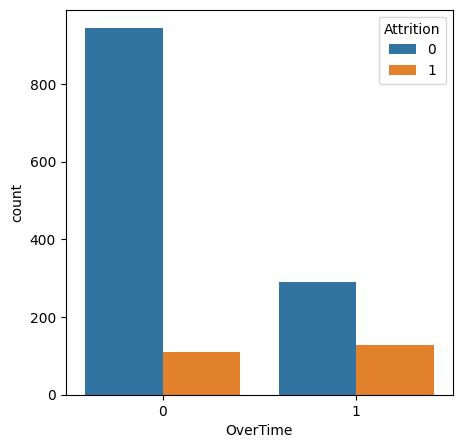

In [17]:
f,ax = plt.subplots(figsize=(5,5))
sns.countplot(x="OverTime",hue="Attrition",data=df)

<Axes: xlabel='Attrition', ylabel='count'>

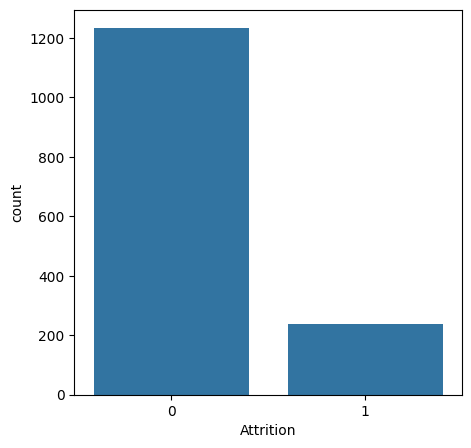

In [18]:
f,ax = plt.subplots(figsize=(5,5))
sns.countplot(x="Attrition",data=df)

In [ ]:
#جدا کردن x,y
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [20]:
y.shape

(1470,)

In [ ]:
#جدا کردن test,train
x_train, x_tast, y_train, y_test =train_test_split(x,y, test_size=0.2)

#Random forest

In [22]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model_rf.predict(x_tast)

In [24]:
report1= classification_report(y_test,y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       234
           1       0.83      0.25      0.38        60

    accuracy                           0.84       294
   macro avg       0.84      0.62      0.65       294
weighted avg       0.84      0.84      0.80       294



In [25]:
report2= accuracy_score(y_test,y_pred)
print(report2)

0.8367346938775511


In [26]:
report3= confusion_matrix(y_test,y_pred)
print(report3)

[[231   3]
 [ 45  15]]


In [27]:
y_test.value_counts()

Attrition
0    234
1     60
Name: count, dtype: int64

logstic

In [30]:
model_lr = LogisticRegression(random_state=42 ,max_iter=100 )
model_lr.fit(x_train,y_train)

C:\Users\DR\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
y_pred = model_lr.predict(x_tast)

In [32]:
report1= classification_report(y_test,y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.82      0.98      0.90       234
           1       0.73      0.18      0.29        60

    accuracy                           0.82       294
   macro avg       0.78      0.58      0.60       294
weighted avg       0.81      0.82      0.77       294



In [33]:
report2= accuracy_score(y_test,y_pred)
print(report2)

0.8197278911564626


In [34]:
report3= confusion_matrix(y_test,y_pred)
print(report3)

[[230   4]
 [ 49  11]]


light gbm

In [36]:
params= {
    'objective' : 'binary',
    'n_estimators' :10000,
    'reg_alpha' : 0.5,
    'reg_lambda':0.5,
    'n_jobs' :-1,
    'colsample_bytree':.8,
    'min_child_weight':8,
    'subsample':0.8715623,
    'min_data_in_leaf':30,
    'nthread':4,
    'metric': 'f1',
    'num_leaves':10,
    'learning_rate':0.005,
    'verbosity' :10,
    'seed':60,
    'max_bin':60,
    'max_depth':3,
    'min_gain_to_split':.0222415,
    'scale_pos_weight':1.4,
    'bagging_fraction':0.8

}


lgb_train = lgb.Dataset(x_train,label=y_train)
lgb_test = lgb.Dataset(x_tast,label=y_test)

model_lgb= lgb.train(params,lgb_train,1000, valid_sets=[lgb_train,lgb_test])

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8715623 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8715623 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 177, number of negative: 999
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.718537
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.168975
[LightGBM] [Debug] init for col-wise cost 0.000089 seconds, init for row-wise cost 0.000113 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

In [37]:
y_pred=model_lgb.predict(x_tast,num_iteration=100)
y_pred

array([0.15615044, 0.29099522, 0.34756709, 0.14754076, 0.16042988,
       0.11862729, 0.12525891, 0.14291922, 0.15893713, 0.13316445,
       0.13109232, 0.14763747, 0.14492758, 0.14457521, 0.13460164,
       0.13421666, 0.24889864, 0.14457521, 0.14025017, 0.15795211,
       0.18159201, 0.13690188, 0.13328589, 0.13460164, 0.20734675,
       0.12781554, 0.15501451, 0.12754024, 0.13242303, 0.18358596,
       0.2105576 , 0.11908331, 0.12653903, 0.22895688, 0.12653903,
       0.21520839, 0.14924252, 0.23893022, 0.12467011, 0.16222594,
       0.13242303, 0.12941587, 0.132785  , 0.14664461, 0.13346369,
       0.12777412, 0.12596763, 0.11908331, 0.12653903, 0.31454669,
       0.11862729, 0.35283392, 0.1649779 , 0.25718791, 0.24889864,
       0.15841065, 0.12637516, 0.2949577 , 0.14633236, 0.2355655 ,
       0.14906101, 0.16459242, 0.14322548, 0.12531351, 0.1284491 ,
       0.12941587, 0.14240645, 0.14984713, 0.17155126, 0.13419987,
       0.30260362, 0.1328332 , 0.19790621, 0.13126418, 0.16173

In [38]:
y_pred =(model_lgb.predict(x_tast,num_iteration=10000) > 0.5) .astype('int32')
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
report1= classification_report(y_test,y_pred)
print(report1)

report3=confusion_matrix(y_test,y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       234
           1       0.81      0.42      0.55        60

    accuracy                           0.86       294
   macro avg       0.84      0.70      0.73       294
weighted avg       0.85      0.86      0.84       294

[[228   6]
 [ 35  25]]


deep

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [41]:
model_dl =Sequential([
    Dense(256, activation='relu' ,input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation ='relu'),
    Dense(1,activation='sigmoid')
])

In [42]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,097
Trainable params: 12,097
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_dl.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])

In [44]:
model_dl.fit(x_train,y_train,epochs=50, batch_size=64 ,verbose=1)

Epoch 1/50
19/19 [==============================] - 0s 1ms/step - loss: 0.9110 - accuracy: 0.7338
Epoch 2/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.8350
Epoch 3/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8486
Epoch 4/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8486
Epoch 5/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8478
Epoch 6/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8495
Epoch 7/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8486
Epoch 8/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8486
Epoch 9/50
19/19 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8503
Epoch 10/50
19/19 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8495
Epoch 11/50
19/19 [

In [47]:
y_pred= model_dl.predict(x_tast)
y_pred

10/10 [==============================] - 0s 666us/step


array([[0.03727049],
       [0.31679812],
       [0.723699  ],
       [0.01649019],
       [0.16485417],
       [0.02046565],
       [0.02060627],
       [0.01902776],
       [0.03099127],
       [0.03172188],
       [0.01141279],
       [0.03593195],
       [0.12821558],
       [0.02906991],
       [0.03710369],
       [0.05482402],
       [0.32482848],
       [0.13710727],
       [0.02195477],
       [0.04315167],
       [0.12053059],
       [0.03731071],
       [0.03919992],
       [0.02849863],
       [0.06863652],
       [0.03514316],
       [0.38937634],
       [0.09021679],
       [0.06795101],
       [0.1776549 ],
       [0.51183164],
       [0.02638707],
       [0.01957394],
       [0.1524351 ],
       [0.05681052],
       [0.11241313],
       [0.03546664],
       [0.1336574 ],
       [0.04355533],
       [0.1170062 ],
       [0.01404376],
       [0.00828307],
       [0.02688427],
       [0.04207511],
       [0.13823707],
       [0.03741388],
       [0.01924852],
       [0.021

In [50]:

y_pred = (y_pred > 0.5).astype(int)

In [51]:
report1 = classification_report(y_test, y_pred)
print("Classification Report:\n", report1)

report3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", report3)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       234
           1       0.76      0.22      0.34        60

    accuracy                           0.83       294
   macro avg       0.80      0.60      0.62       294
weighted avg       0.82      0.83      0.79       294

Confusion Matrix:
 [[230   4]
 [ 47  13]]
